In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline

import networkx as nx  # Library for hanling graphs (please check 4_Introduction_Graph)
import random # possibility to create random numbers (The "P" in PRM)
import numpy as np
import math

# sort nearest neighbour brute force
import heapq
import copy
# reduce coding effort by using function provided by scipy
from scipy.spatial.distance import euclidean

In [9]:
def inSameConnectedComponent(node1, node2, graph):
    """ Check whether to nodes are part of the same connected component using
        functionality from NetworkX
    """
    for connectedComponent in nx.connected_components(graph):
        if (node1 in connectedComponent) & (node2 in connectedComponent):
            return True
        
    return False

In [10]:

def nearestNeighboursX(pos, graph, radius):
    """ Brute Force method to find all nodes of a 
    graph near the given position **pos** with in the distance of
    **radius** in **increasing order**"""
    
    heap = list()
    for node in graph.nodes(data=True): # using (data=True) will generate a list of nodes with all attributes
        if euclidean(node[1]['pos'],pos) < radius:
            # use a heap-queue to sort the nodes in increasing order
            heapq.heappush(heap, (euclidean(node[1]['pos'] ,pos), node))
            #if len(heap) > 2 :
            #    break

    result = list()
    while len(heap) > 0 :
         result.append(heapq.heappop(heap)) 
    
    return result
            
            

In [25]:
import random

def Gaussian_sampling(collChecker):
    
    limits = collChecker.getEnvironmentLimits()        
    pos = [random.uniform(limit[0],limit[1]) for limit in limits]
    
    
    #get a colliding point
    for t in range(0,10):
        while not collChecker.pointInCollision(pos):
            pos = [random.uniform(limit[0],limit[1]) for limit in limits]
        
        #store the x and y value of the colliding point
        pos_x=pos[0]
        pos_y=pos[1]
    
        #find a non colliding point in a given distance to point a 
        for i in range(0,50):
        #get a distance over a gaussian distribution   
            me,sigma = 0,1 #Mean value of the gaussian distribution, standard deviation 
            d=np.random.normal(me,sigma)
            angle_list = [0,2*math.pi]
            for n in range(4):
                #alpha=random.uniform(0,360)*(180/math.pi) #get an random angle in ra
                templist = copy.deepcopy(angle_list)
                new_angles_list =[]
                verschoben = 1 #ja es gibt was hier zu sehen
                for idx in range(len(templist)-1):
                    new_angle = (templist[idx]+templist[idx+1])/2
                    new_angles_list.append(new_angle)
                    angle_list.insert(idx+verschoben,new_angle)
                    verschoben +=1
                for alpha in new_angles_list:    
                    pos2_x= d*math.cos(alpha)+pos_x
                    pos2_y= d*math.sin(alpha)+pos_y
                    pos2=[pos2_x,pos2_y]
                    if not collChecker.pointInCollision(pos2): #return point when collision free
                        return pos2
    
    #return [1,2]
    #if no point found with gaussian pick a random collison free point
    
    while collChecker.pointInCollision(pos):
        pos = [random.uniform(limit[0],limit[1]) for limit in limits]
    return pos
         
print("Hi")     
   

Hi


dasdf as f


In [26]:
def learnRoadmapNearestNeighbour(graph, dim, radius, numNodes, collisionChecker):
    i = 1
    while i < numNodes:
        
        # Generate a 'randomly chosen, free configuration'
        pos = Gaussian_sampling(collisionChecker)
        
        # Find set of candidates to connect to sorted by distance
        result = nearestNeighboursX(pos, graph, radius)
        
        # check connection
        graph.add_node(i, pos=pos)
        for idx, data in enumerate(result):
            if not inSameConnectedComponent(i,data[1][0],graph):
                if not collisionChecker.lineInCollision(pos,data[1][1]['pos']):
                    graph.add_edge(i,data[1][0])
                    
        i+=1


In [27]:
def findPath(graph, start, goal,collisionChecker):
    # find nearest, collision-free connection between node on graph and start
    result = nearestNeighboursX(start, graph, radius)
    for node in result:
        if not collisionChecker.lineInCollision(start,node[1][1]['pos']):
            graph.add_node("start", pos=start)
            graph.add_edge("start",node[1][0])
            break;
    # find nearest, collision-free connection between node on graph and goal
    result = nearestNeighboursX(goal, graph, radius)
    
    for node in result:
        if not collisionChecker.lineInCollision(goal,node[1][1]['pos']):
            graph.add_node("goal", pos=goal)
            graph.add_edge("goal",node[1][0])
            break;
    # find shortest path on graph
    path = nx.shortest_path(graph,"start","goal")
    # return nodelist
    return path
    

In [28]:
def basicPRMVisualize(graph, collChecker, solution, nodeSize=300.0, ax=None):
    # get a list of posiations of all nodes by returning the content of the attribute 'pos'
    pos = nx.get_node_attributes(graph,'pos')
    
    # draw graph (nodes colorized by degree)
    nx.draw_networkx_nodes(graph, pos,  cmap=plt.cm.Blues, ax = ax, node_size=nodeSize)
    nx.draw_networkx_edges(graph,pos,
                                ax = ax
                                )
    
   
    

    collChecker.drawObstacles(ax)
    
    
    # draw nodes based on solution path
    Gsp = nx.subgraph(graph,solution)
    nx.draw_networkx_nodes(Gsp,pos,
                            node_size=300,
                             node_color='g',  ax = ax)
        
    # draw edges based on solution path
    nx.draw_networkx_edges(Gsp,pos,alpha=0.8,edge_color='g',width=10,  ax = ax)
        
    # draw start and goal
    if "start" in graph.nodes(): 
        nx.draw_networkx_nodes(graph,pos,nodelist=["start"],
                                   node_size=300,
                                   node_color='#00dd00',  ax = ax)
    if "goal" in graph.nodes():
        nx.draw_networkx_nodes(graph,pos,nodelist=["goal"],
                                   node_size=300,
                                   node_color='#DD0000', ax = ax)


In [29]:
import importlib
import IPTestSuite

importlib.reload(IPTestSuite)

dim=2

In [30]:
for benchmark in IPTestSuite.benchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
Spirals
Entrance
Entrances
KIT
Inside
SSL
Ring
Hemispheres
Hammerhead
Zigzag
Spiral
medium
medium2
L-square
Teeth
Gearshift
Squares_easy
Zigzag_medium
Zigzag_hard
Japan
Haystack
HairPerson


Planning:  Entrances
Failed No path between start and goal.
Planning:  KIT


c:\Users\jonas\Documents\08_Master\Python_Projekte\Roboter_Programmierung\Roboterprogrammierung_Projektarbeit\venv\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


Failed Either source start or target goal is not in G
Planning:  Inside
['start', 123, 57, 34, 14, 157, 160, 79, 25, 24, 40, 36, 20, 45, 62, 22, 13, 21, 37, 92, 28, 90, 211, 66, 42, 7, 48, 17, 5, 1, 6, 47, 158, 'goal'] 34
301
Planning:  SSL


c:\Users\jonas\Documents\08_Master\Python_Projekte\Roboter_Programmierung\Roboterprogrammierung_Projektarbeit\venv\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


Failed Either source start or target goal is not in G
Planning:  Ring
['start', 266, 238, 36, 16, 32, 4, 19, 11, 2, 45, 119, 101, 60, 92, 165, 105, 52, 41, 84, 241, 'goal'] 22
301
Planning:  Hemispheres
Failed Either source start or target goal is not in G
Planning:  Hammerhead
['start', 160, 52, 30, 13, 6, 5, 23, 18, 21, 17, 1, 43, 139, 10, 4, 36, 15, 2, 26, 44, 19, 7, 97, 100, 87, 65, 56, 11, 9, 91, 16, 32, 14, 12, 20, 53, 70, 138, 'goal'] 40
301
Planning:  Zigzag
['start', 63, 74, 84, 153, 216, 83, 71, 12, 3, 27, 31, 57, 92, 51, 67, 271, 204, 14, 140, 148, 25, 23, 20, 54, 178, 43, 211, 208, 70, 68, 40, 6, 32, 189, 144, 122, 291, 287, 118, 46, 80, 231, 'goal'] 44
301
Planning:  Spiral
Failed No path between start and goal.
Planning:  medium
Failed Either source start or target goal is not in G
Planning:  medium2
['start', 115, 107, 102, 63, 13, 1, 41, 90, 2, 9, 7, 29, 8, 38, 53, 17, 12, 6, 5, 10, 43, 46, 271, 'goal'] 25
301
Planning:  L-square
Failed Either source start or target goa

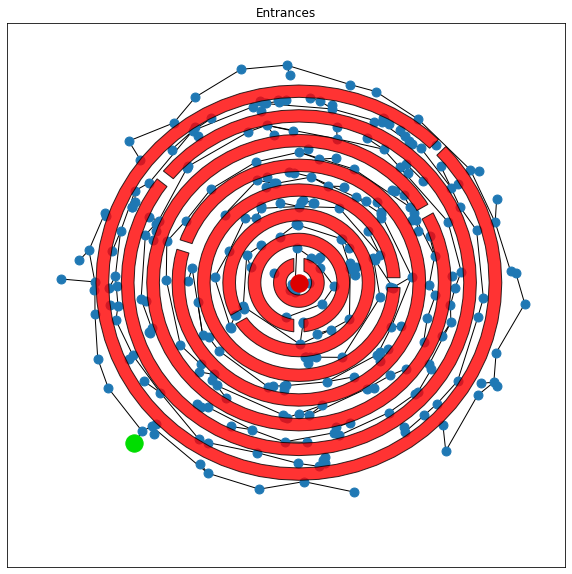

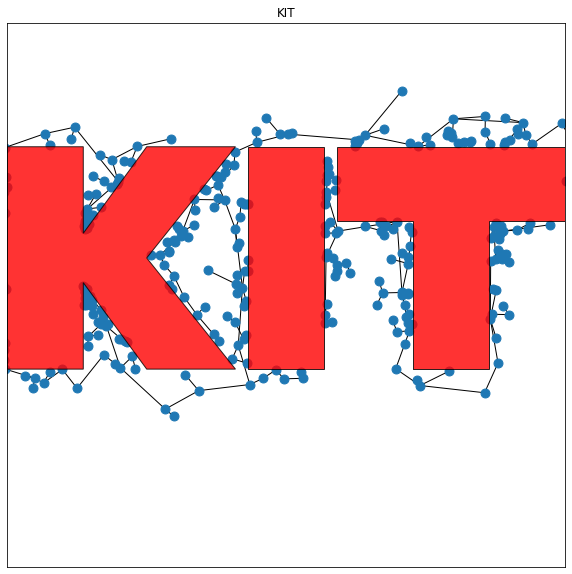

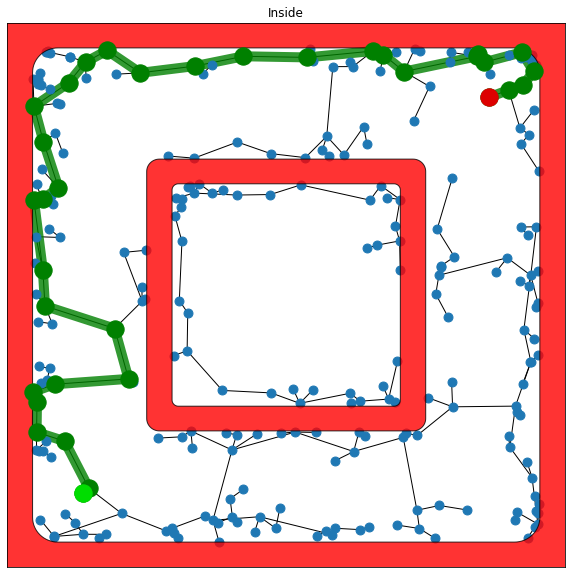

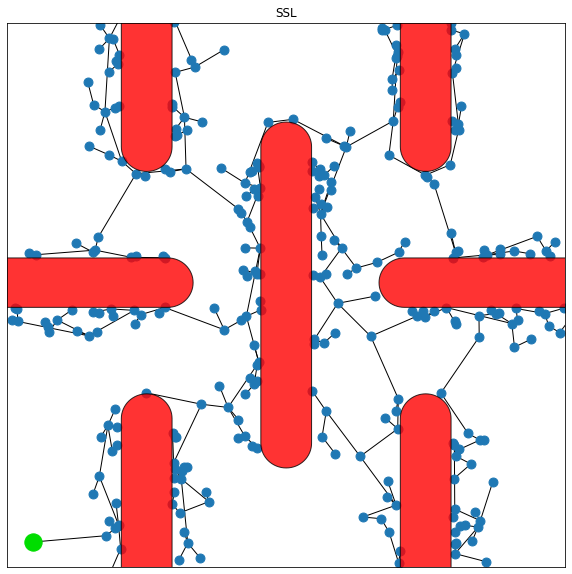

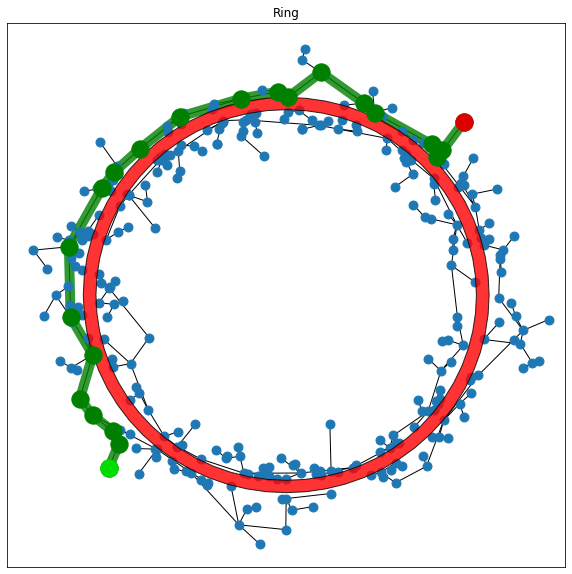

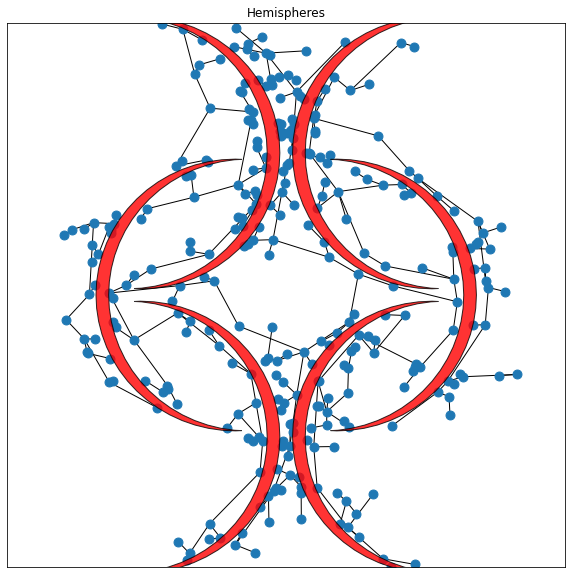

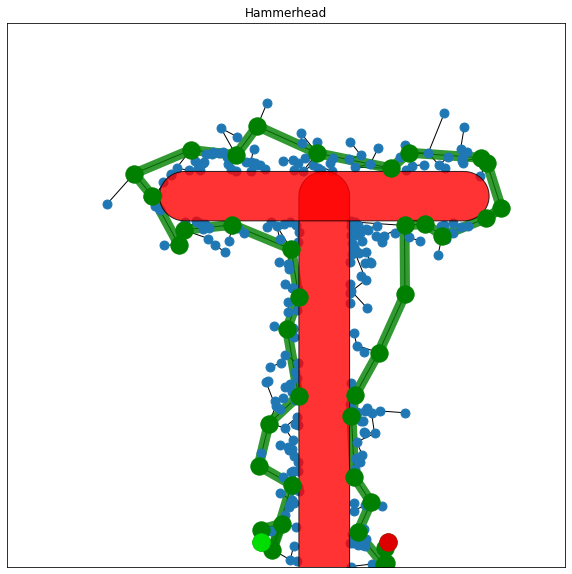

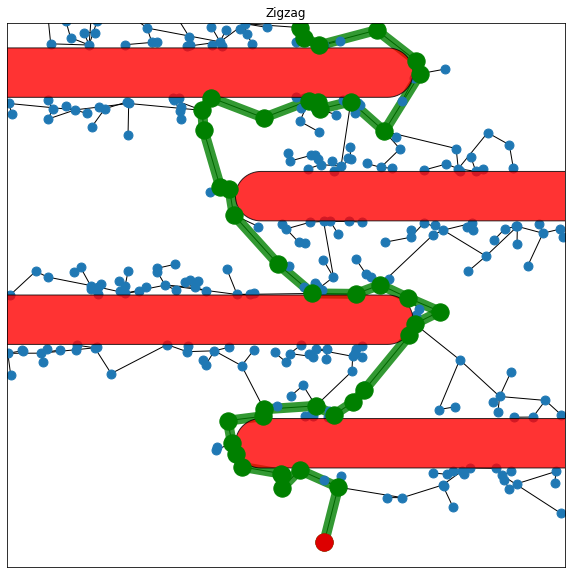

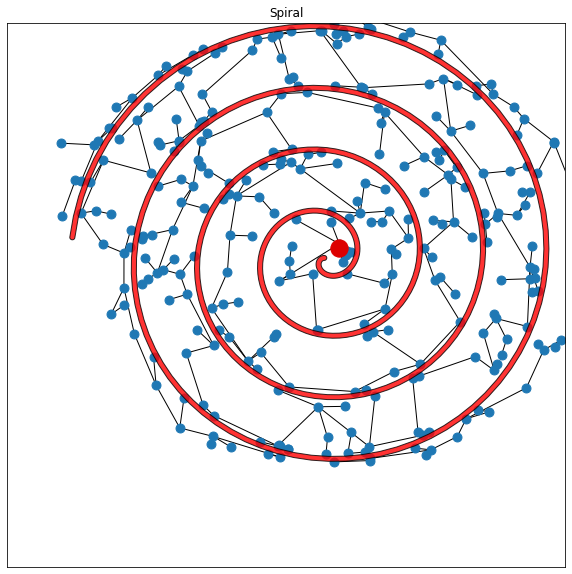

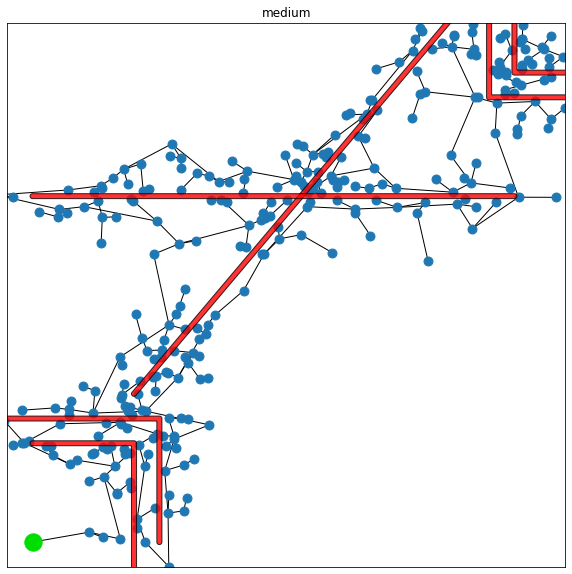

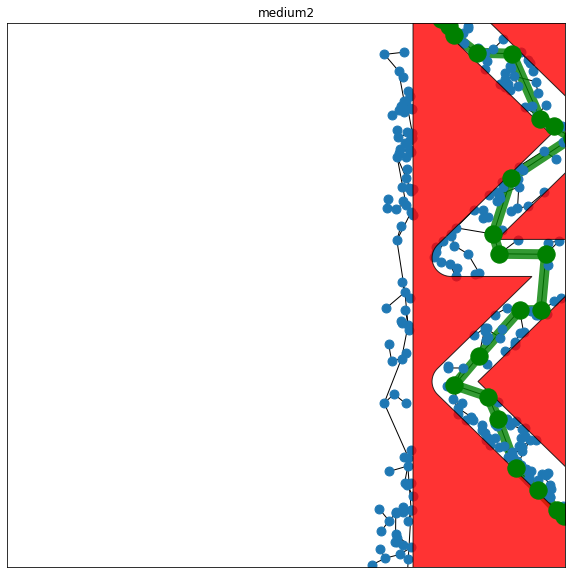

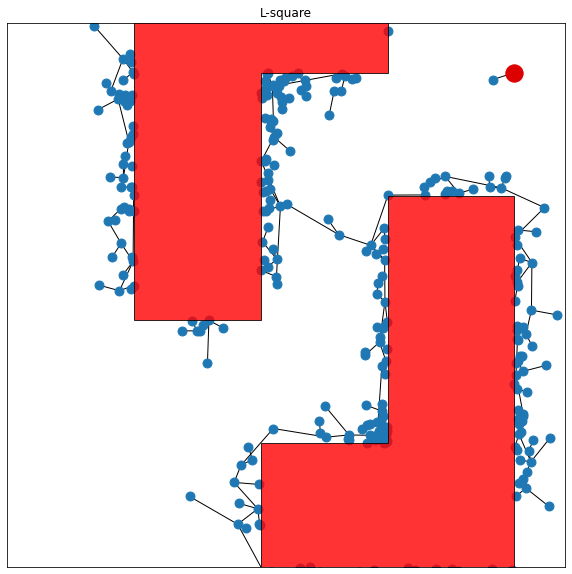

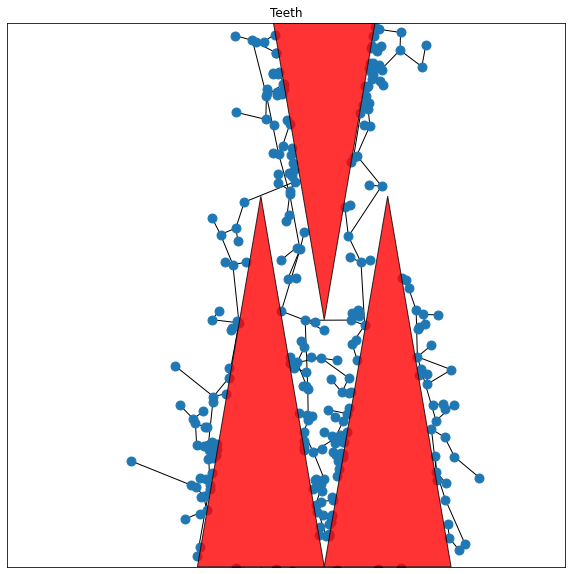

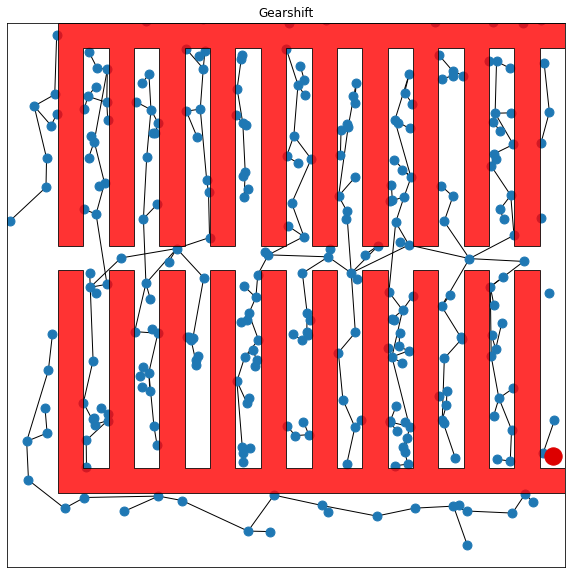

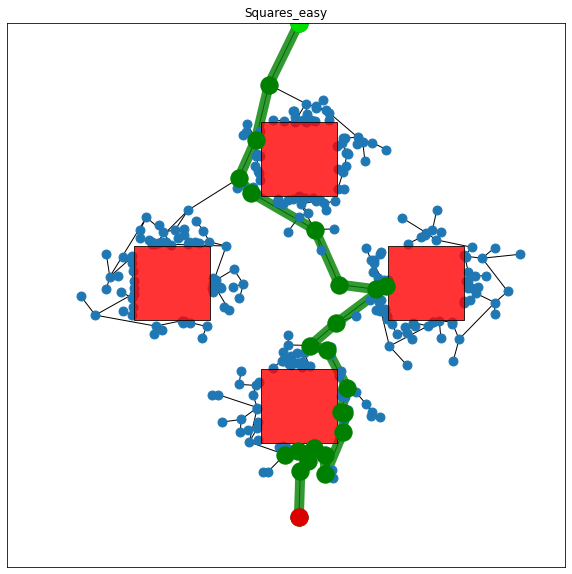

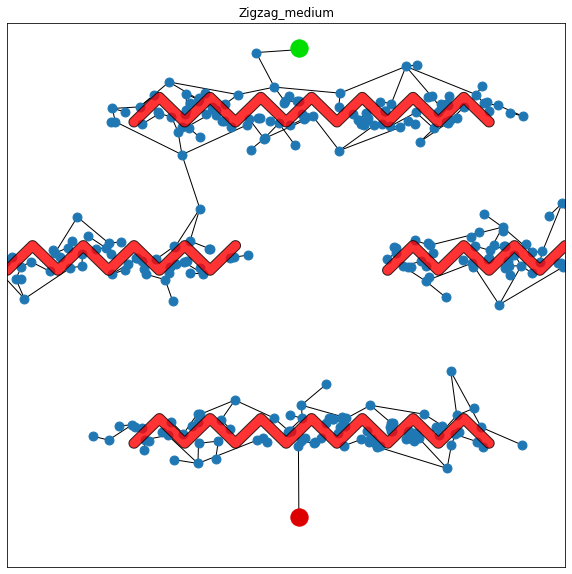

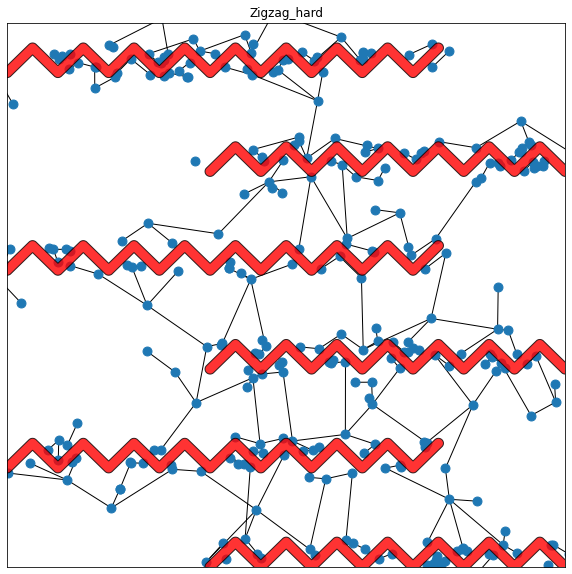

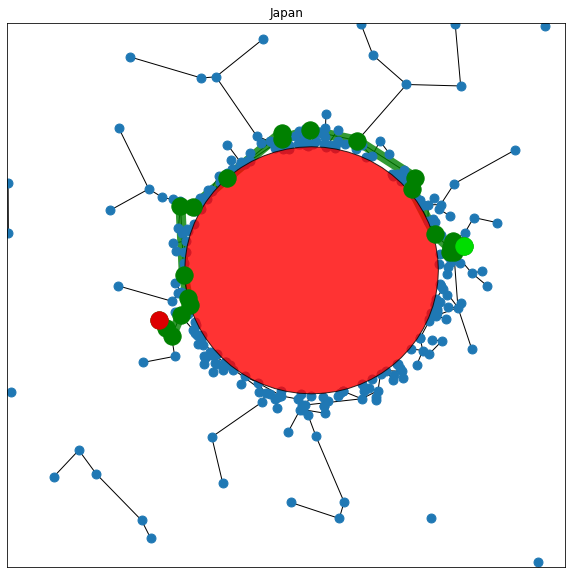

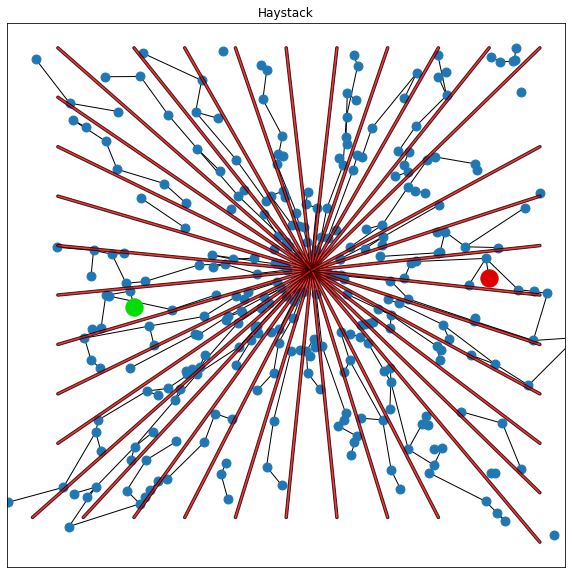

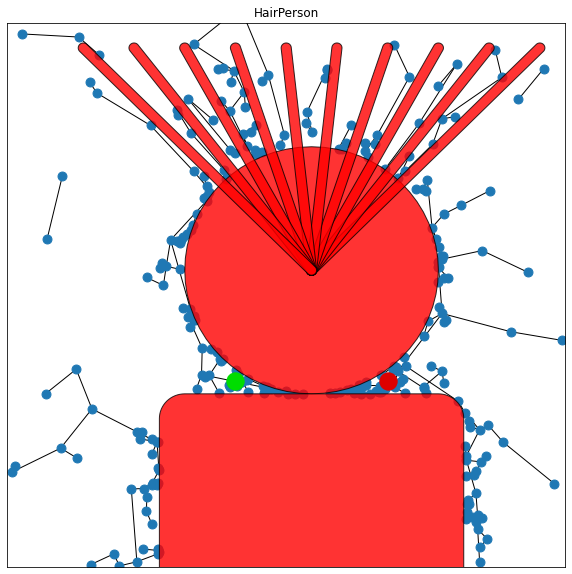

In [31]:
temp_list=IPTestSuite.benchList[5 :]

for benchmark in temp_list:
    try:
        print ("Planning: ", benchmark.name)
        collChecker = benchmark.collisionChecker
        G = nx.Graph()
        radius = 3.0
        numNodes = 300
        learnRoadmapNearestNeighbour(G, dim, radius, numNodes, collChecker)
        solution = findPath(G,benchmark.startList[0],benchmark.goalList[0], collChecker)
        print(solution, len(solution))
        print(len(G.nodes()))
        
    except Exception as e:
        solution = []
        print ("Failed", e)
    # draw the planning
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    limits=collChecker.getEnvironmentLimits()
    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    ax.set_title(benchmark.name)
    basicPRMVisualize(G,collChecker,solution,nodeSize=80,ax=ax)